TELECHARGEMENT DES BIBLIOTHEQUES

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

TELECHARGEMENT DES DONNEES

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sudhanvahg/30-indian-cities-information-technology-dataset")

print("Path to dataset files:", path)

100%|██████████| 8.70k/8.70k [00:00<00:00, 12.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sudhanvahg/30-indian-cities-information-technology-dataset/versions/1


# NETTOYAGE DES DONNEES


In [20]:
# Vérifier les valeurs manquantes avant imputation
print("Valeurs manquantes avant imputation :\n", df.isnull().sum())

# Sélectionner les colonnes numériques pour l'imputation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Remplacer les valeurs manquantes par la moyenne pour les colonnes numériques
for col in numeric_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())

# Vérifier les valeurs manquantes après imputation
print("\nValeurs manquantes après imputation :\n", df.isnull().sum())

Valeurs manquantes avant imputation :
 City                                                0
Year                                                0
Household Internet Access (%)                       0
Fixed Broadband Subscriptions (%)                   0
Wireless Broadband Subscriptions (%)                0
Wireless Broadband Coverage 3G (%)                  0
Wireless Broadband Coverage 4G (%)                  0
Smart Water Meters (%)                              0
Smart Electricity Meters (%)                        0
Dynamic Public Transport Information (%)            0
Traffic Monitoring (%)                              0
Availability of WIFI in Public Areas (count)        0
Water Supply ICT Monitoring (%)                     0
Drainage / Storm Water System ICT Monitoring (%)    0
Electricity Supply ICT Monitoring (%)               0
Demand Response Penetration (%)                     0
Intersection Control (%)                            0
Open data (%)                              

In [6]:
df = pd.read_csv(f'{path}/ICT_Subdimension_Dataset.csv')
df.head()

,City,Year,Household Internet Access (%),Fixed Broadband Subscriptions (%),Wireless Broadband Subscriptions (%),Wireless Broadband Coverage 3G (%),Wireless Broadband Coverage 4G (%),Smart Water Meters (%),Smart Electricity Meters (%),Dynamic Public Transport Information (%),Traffic Monitoring (%),Availability of WIFI in Public Areas (count),Water Supply ICT Monitoring (%),Drainage / Storm Water System ICT Monitoring (%),Electricity Supply ICT Monitoring (%),Demand Response Penetration (%),Intersection Control (%),Open data (%),e-Government (%),Public Sector e-procurement (%)
0,Mumbai,2019,79.45,48.00,50.35,91.57,59.19,33.30,43.4,10.04,15.30,137,31.31,20.72,33.88,10.05,15.48,4.85,19.07,24.20
1,Mumbai,2020,79.45,54.26,53.38,92.58,64.12,34.34,43.4,14.06,20.40,172,36.53,24.86,38.72,13.06,18.57,6.79,22.88,29.04
2,Mumbai,2021,80.43,54.26,60.42,93.60,69.06,34.34,43.4,18.08,25.49,167,41.74,29.00,43.56,16.08,21.67,8.73,26.70,33.88
3,Mumbai,2022,86.32,54.26,66.47,94.62,73.99,34.34,43.4,22.09,30.59,142,46.96,33.15,48.40,19.09,24.76,10.67,30.51,38.73
4,Mumbai,2023,86.32,54.26,66.47,95.64,78.92,35.38,43.4,26.11,35.69,143,52.18,37.29,53.24,22.11,27.86,12.61,34.32,43.57


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 20 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   City                                              180 non-null    object 
 1   Year                                              180 non-null    int64  
 2   Household Internet Access (%)                     180 non-null    float64
 3   Fixed Broadband Subscriptions (%)                 180 non-null    float64
 4   Wireless Broadband Subscriptions (%)              180 non-null    float64
 5   Wireless Broadband Coverage 3G (%)                180 non-null    float64
 6   Wireless Broadband Coverage 4G (%)                180 non-null    float64
 7   Smart Water Meters (%)                            180 non-null    float64
 8   Smart Electricity Meters (%)                      180 non-null    float64
 9   Dynamic Public Transp

In [ ]:
EXPLORATION DES DONNEES

### Matrice de Corrélation des Données Numériques

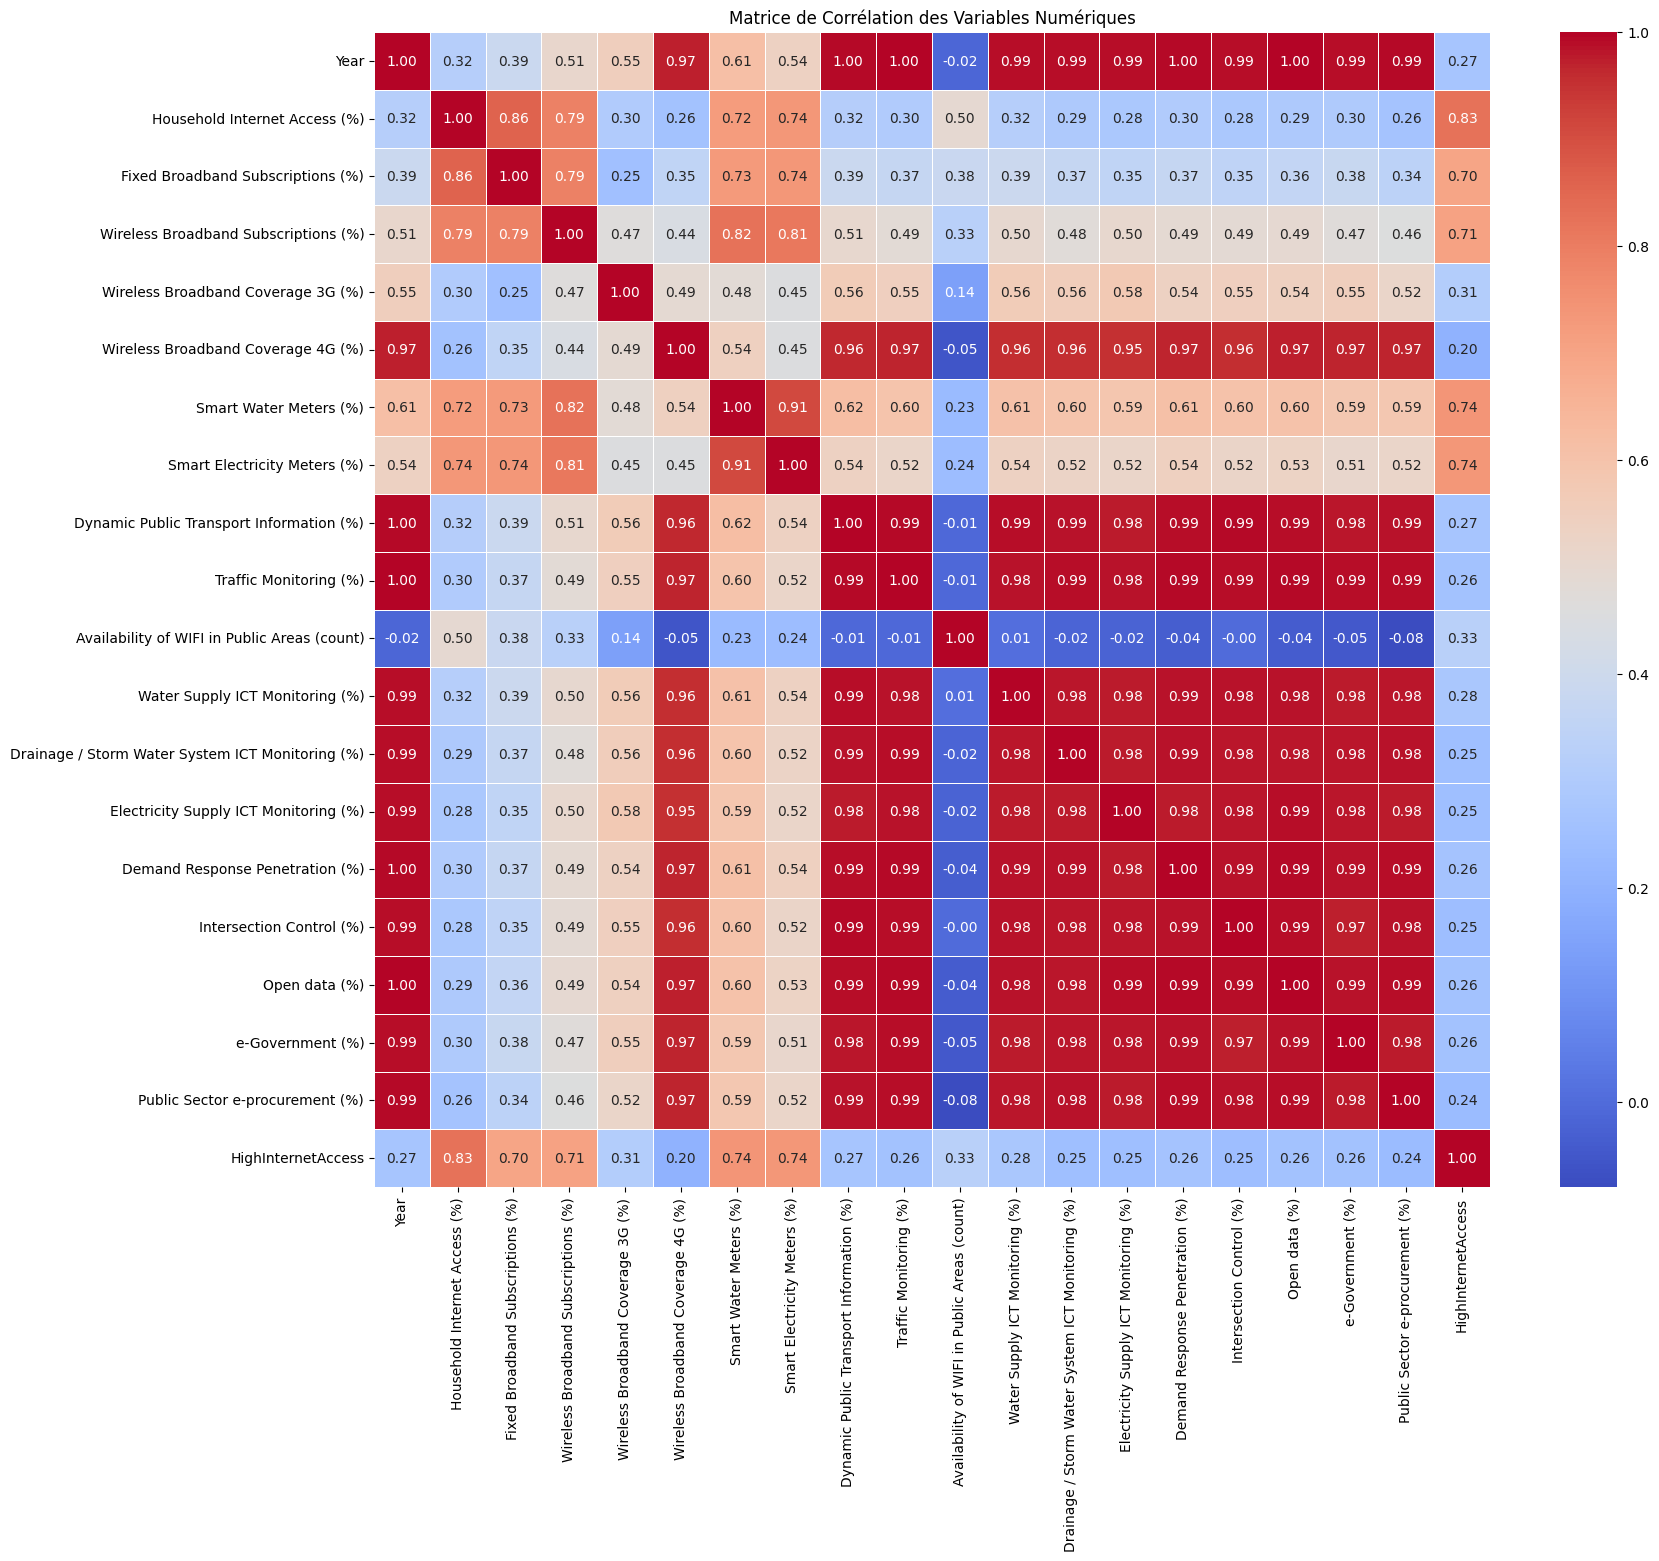

In [18]:
# Sélectionner uniquement les colonnes numériques pour la matrice de corrélation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculer la matrice de corrélation
correlation_matrix = numeric_df.corr()

# Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()

In [8]:
df.describe()


,Year,Household Internet Access (%),Fixed Broadband Subscriptions (%),Wireless Broadband Subscriptions (%),Wireless Broadband Coverage 3G (%),Wireless Broadband Coverage 4G (%),Smart Water Meters (%),Smart Electricity Meters (%),Dynamic Public Transport Information (%),Traffic Monitoring (%),Availability of WIFI in Public Areas (count),Water Supply ICT Monitoring (%),Drainage / Storm Water System ICT Monitoring (%),Electricity Supply ICT Monitoring (%),Demand Response Penetration (%),Intersection Control (%),Open data (%),e-Government (%),Public Sector e-procurement (%)
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,2021.500000,72.998167,45.900444,56.287444,93.239944,72.326944,29.933278,35.485389,20.019389,27.641611,105.466667,42.371889,30.104000,47.803889,17.553611,22.411278,9.936556,30.018222,37.595278
std,1.712589,8.984674,8.389596,8.716689,3.124068,8.791971,7.813442,9.652940,6.886342,8.642577,20.298168,8.611707,6.938159,8.724584,5.177225,5.162420,3.417569,6.930577,8.653516
min,2019.000000,53.650000,23.970000,33.000000,85.570000,57.110000,9.920000,16.990000,9.500000,14.270000,67.000000,28.640000,19.170000,33.250000,9.600000,14.320000,4.750000,19.070000,23.850000
25%,2020.000000,65.170000,39.640000,48.460000,90.985000,64.910000,24.120000,29.090000,14.112500,20.212500,89.750000,34.970000,24.022500,40.472500,13.057500,17.892500,6.930000,24.100000,30.170000
50%,2021.500000,72.985000,46.685000,56.000000,93.475000,72.255000,27.590000,31.800000,19.885000,27.315000,103.500000,42.345000,30.030000,47.365000,17.515000,22.445000,9.935000,29.935000,37.430000
75%,2023.000000,79.475000,52.575000,64.410000,95.512500,79.560000,36.100000,42.827500,26.175000,35.320000,114.000000,49.700000,35.980000,55.570000,22.087500,26.785000,12.800000,36.025000,45.077500
max,2024.000000,92.630000,60.720000,72.880000,99.560000,88.280000,47.240000,56.830000,31.460000,41.740000,172.000000,57.400000,41.970000,62.950000,26.230000,31.410000,15.680000,41.950000,52.420000


<Axes: xlabel='Year', ylabel='Household Internet Access (%)'>

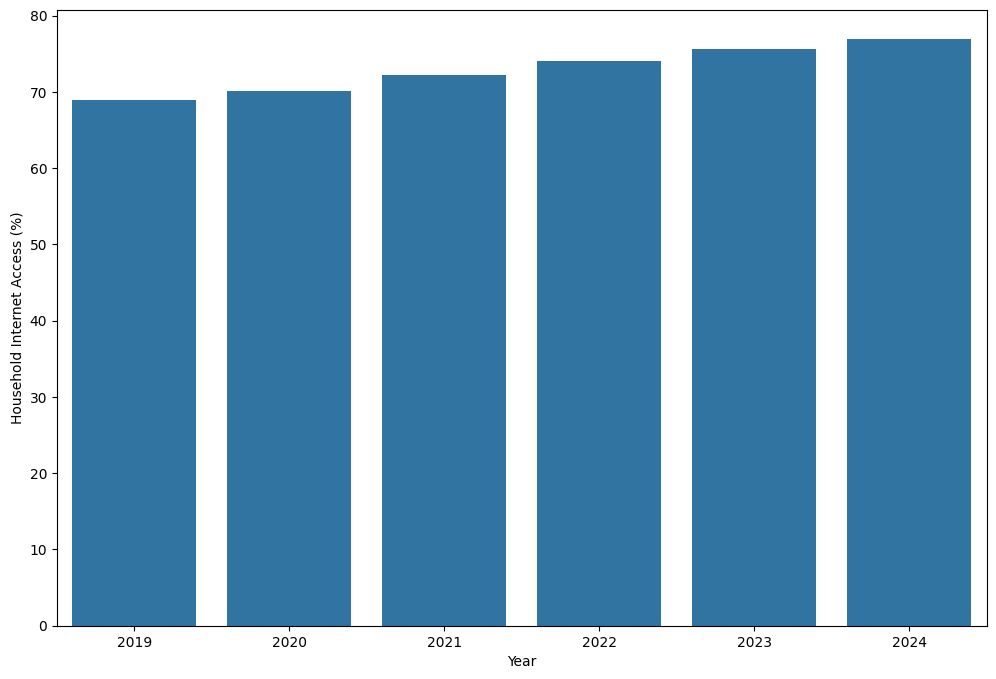

In [9]:
plt.figure(figsize = (12,8))
sns.barplot(x=df['Year'],y=df['Household Internet Access (%)'],data=df,errorbar=None)


VISUALISATION DES DONNEES

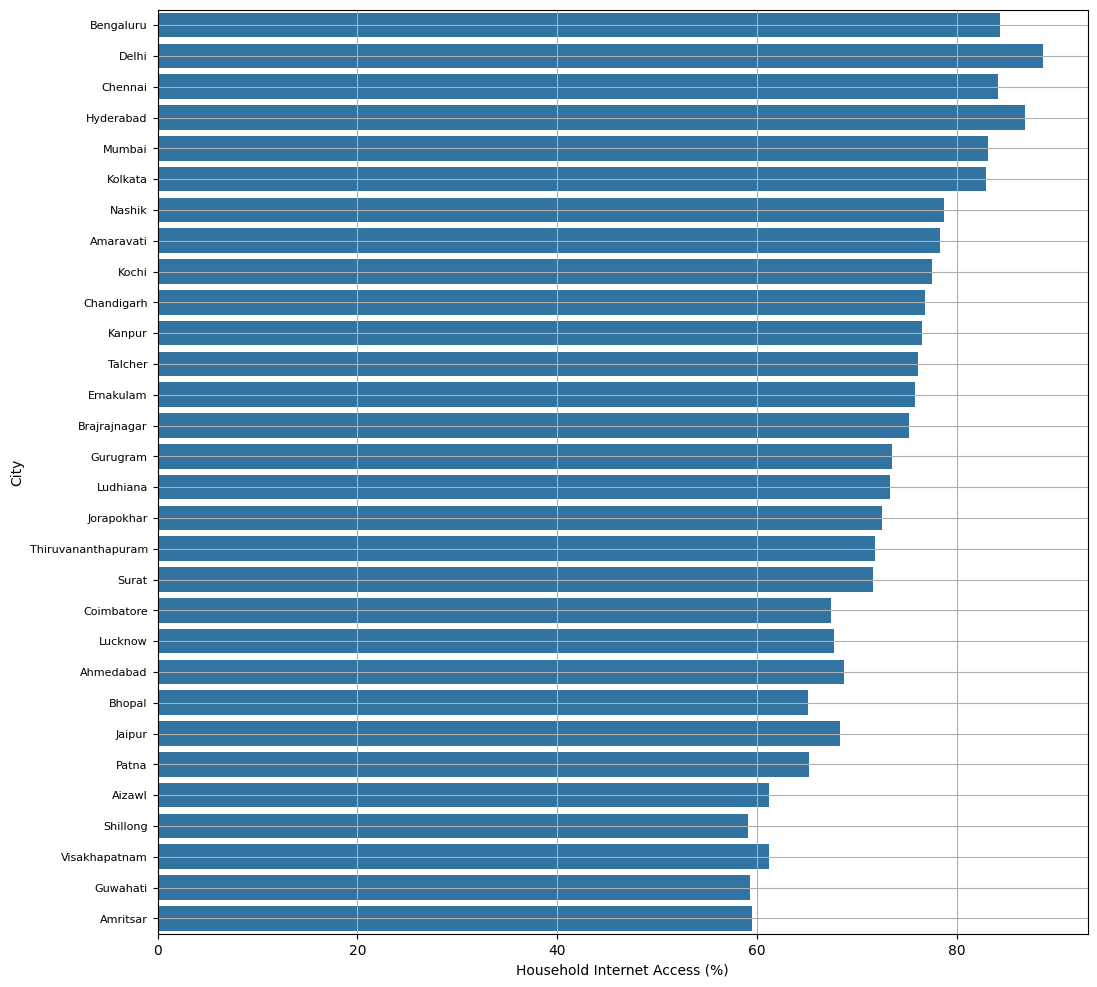

In [10]:
df_sorted = df.sort_values(by='Household Internet Access (%)', ascending=False)
plt.figure(figsize = (12,12))
sns.barplot(x='Household Internet Access (%)',y='City',data=df_sorted,errorbar=None)
plt.yticks(rotation=0, fontsize=8)
plt.grid()


In [11]:
most_usage_year = df_sorted[df_sorted['Year'] == 2024]


In [12]:
most_usage_year['City'].head


<bound method NDFrame.head of 17              Bengaluru
11                  Delhi
29                Chennai
23              Hyderabad
5                  Mumbai
119               Kolkata
161                Nashik
47              Amaravati
113                 Kochi
71             Chandigarh
173                Kanpur
143               Talcher
83              Ernakulam
65           Brajrajnagar
89               Gurugram
167              Ludhiana
107            Jorapokhar
149    Thiruvananthapuram
179                 Surat
77             Coimbatore
125               Lucknow
35              Ahmedabad
59                 Bhopal
101                Jaipur
131                 Patna
41                 Aizawl
137              Shillong
155         Visakhapatnam
95               Guwahati
53               Amritsar
Name: City, dtype: object>

/tmp/ipython-input-1397628536.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=10)
/tmp/ipython-input-1397628536.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=10)
/tmp/ipython-input-1397628536.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=10)
/tmp/ipython-input-1397628536.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=10)
/tmp/ipython-input-1397628536.py:12: UserWarning: set_ticklabels() should on

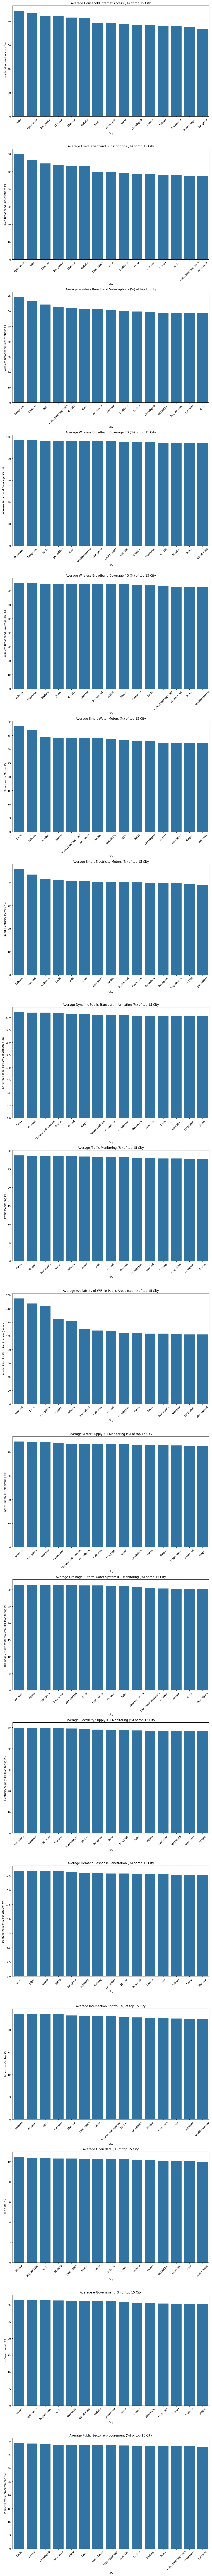

In [13]:
numeric_cols = [col for col in df_sorted.columns if col not in ['City', 'Year']]
fig, axes = plt.subplots(nrows=len(numeric_cols), figsize=(12, 8 * len(numeric_cols)))

for i,col in enumerate(numeric_cols):
    df_cols = df_sorted.groupby(['City'])[[col]].mean().reset_index()
    df_cols = df_cols.sort_values(by=[col], ascending=False).head(15)
    sns.barplot(x='City',y=col,data=df_cols,ax=axes[i])
    axes[i].set_xlabel('City')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'Average {col} of top 15 City')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=10)

plt.tight_layout()
plt.show()


## Régression Linéaire

In [15]:
# Préparation des données pour la régression linéaire
X_lr = df.drop(['City', 'Year', 'Household Internet Access (%)'], axis=1)
y_lr = df['Household Internet Access (%)']

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Création du pipeline de prétraitement et du modèle
numeric_features_lr = X_lr.select_dtypes(include=['int64', 'float64']).columns

preprocessor_lr = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_lr)
    ])

linear_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_lr),
    ('regressor', LinearRegression())
])

# Entraînement du modèle
linear_regression_pipeline.fit(X_train_lr, y_train_lr)

# Prédictions et évaluation
y_pred_lr = linear_regression_pipeline.predict(X_test_lr)
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)
r2_lr = r2_score(y_test_lr, y_pred_lr)

print(f"Linear Regression - Mean Squared Error: {mse_lr:.2f}")
print(f"Linear Regression - R-squared: {r2_lr:.2f}")

Linear Regression - Mean Squared Error: 23.42
Linear Regression - R-squared: 0.71


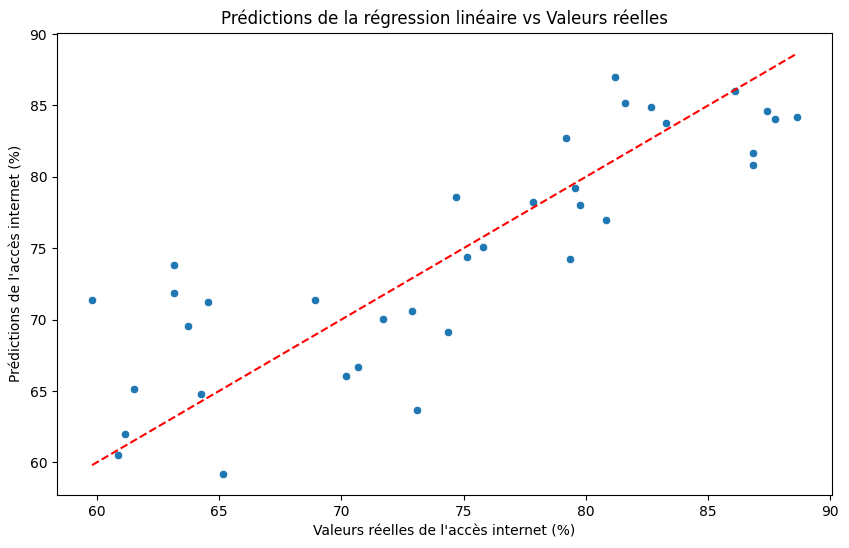

In [16]:
# Visualisation des prédictions vs valeurs réelles pour la régression linéaire
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_lr, y=y_pred_lr)
plt.xlabel("Valeurs réelles de l'accès internet (%)")
plt.ylabel("Prédictions de l'accès internet (%)")
plt.title("Prédictions de la régression linéaire vs Valeurs réelles")
plt.plot([y_test_lr.min(), y_test_lr.max()], [y_test_lr.min(), y_test_lr.max()], 'r--')
plt.show()

## Régression Logistique

In [17]:
# Préparation des données pour la régression logistique
# Création d'une variable cible binaire pour la régression logistique
# Par exemple, si l'accès internet est supérieur à la médiane, c'est 'élevé', sinon 'faible'.
median_internet_access = df['Household Internet Access (%)'].median()
df['HighInternetAccess'] = (df['Household Internet Access (%)'] > median_internet_access).astype(int)

X_log = df.drop(['City', 'Year', 'Household Internet Access (%)', 'HighInternetAccess'], axis=1)
y_log = df['HighInternetAccess']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Création du pipeline de prétraitement et du modèle
numeric_features_log = X_log.select_dtypes(include=['int64', 'float64']).columns

preprocessor_log = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_log)
    ])

logistic_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_log),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])

# Entraînement du modèle
logistic_regression_pipeline.fit(X_train_log, y_train_log)

# Prédictions et évaluation
y_pred_log = logistic_regression_pipeline.predict(X_test_log)

accuracy_log = accuracy_score(y_test_log, y_pred_log)
precision_log = precision_score(y_test_log, y_pred_log)
recall_log = recall_score(y_test_log, y_pred_log)
f1_log = f1_score(y_test_log, y_pred_log)
matthews_corrcoef_log = matthews_corrcoef(y_test_log, y_pred_log)

print(f"Logistic Regression - Accuracy: {accuracy_log:.2f}")
print(f"Logistic Regression - Precision: {precision_log:.2f}")
print(f"Logistic Regression - Recall: {recall_log:.2f}")
print(f"Logistic Regression - F1-Score: {f1_log:.2f}")
print(f"Logistic Regression - Matthews Correlation Coefficient: {matthews_corrcoef_log:.2f}")

Logistic Regression - Accuracy: 0.94
Logistic Regression - Precision: 1.00
Logistic Regression - Recall: 0.90
Logistic Regression - F1-Score: 0.95
Logistic Regression - Matthews Correlation Coefficient: 0.89


### Matrice de Confusion pour la Régression Logistique

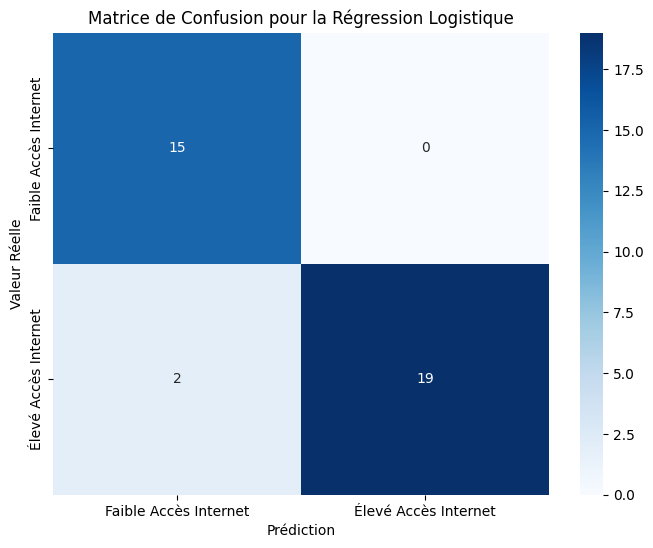

In [19]:
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
cm = confusion_matrix(y_test_log, y_pred_log)

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Faible Accès Internet', 'Élevé Accès Internet'],
            yticklabels=['Faible Accès Internet', 'Élevé Accès Internet'])
plt.xlabel('Prédiction')
plt.ylabel('Valeur Réelle')
plt.title('Matrice de Confusion pour la Régression Logistique')
plt.show()